In [1]:
#libraries
import anndata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import seaborn as sns

In [2]:
data_path = '/sc-projects/sc-proj-dh-ag-eils-ml/genotype_data/900k_snp_chr1.h5ad'
build_path = '/sc-projects/sc-proj-dh-ukb-intergenics/analysis/development/lesi11/build/'
adata = anndata.read_h5ad(data_path, backed='r')

print(adata.shape)
print(adata.var_names) 
print(adata.obs_names)

(10000, 890552)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '890542', '890543', '890544', '890545', '890546', '890547', '890548',
       '890549', '890550', '890551'],
      dtype='object', length=890552)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '9990', '9991', '9992', '9993', '9994', '9995', '9996', '9997', '9998',
       '9999'],
      dtype='object', length=10000)


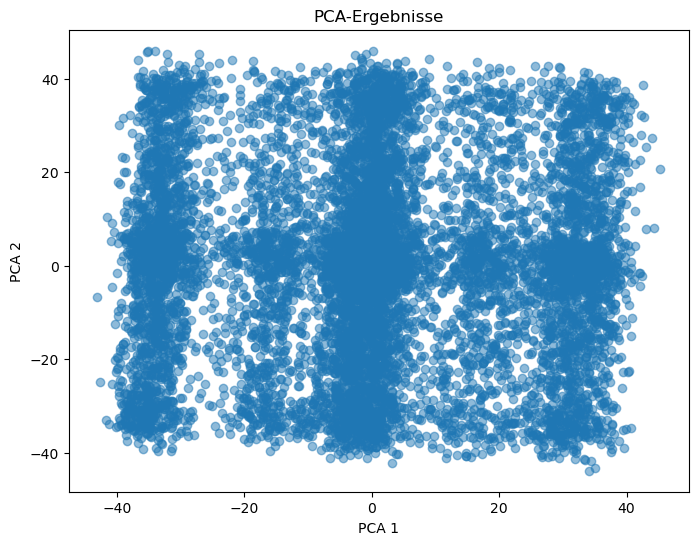

In [4]:
# PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(adata.X)
pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
pca_df.to_csv(build_path + 'pca_results.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.title('PCA-Ergebnisse')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [4]:
# t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(adata.X)
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df.to_csv(build_path + 'tsne_results.csv', index=False)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Ergebnis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

: 

In [ ]:
# UMAP
reducer = umap.UMAP()
umap_results = reducer.fit_transform(adata.X)
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df.to_csv('results/umap_results.csv', index=False)

plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP Ergebnis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
# Kernel-PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kernel_pca_results = kernel_pca.fit_transform(adata.X)
kernel_pca_df = pd.DataFrame(kernel_pca_results, columns=['KernelPCA1', 'KernelPCA2'])
kernel_pca_df.to_csv('results/kernel_pca_results.csv', index=False)

plt.scatter(kernel_pca_results[:, 0], kernel_pca_results[:, 1])
plt.title('Kernel PCA Ergebnis')
plt.xlabel('Kernel Hauptkomponente 1')
plt.ylabel('Kernel Hauptkomponente 2')
plt.show()

In [ ]:
# Die suche nach richitge Hyperparameter 
X = adata.X

pca = PCA(n_components=min(X.shape[0], X.shape[1]))
pca.fit(X)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz durch PCA')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.text(0, 0.91, '90% erklärte Varianz', color = 'red')
plt.show()


In [ ]:
# Berechn ung der Matrizen
input_path = 'results/'
output_path = 'matrices/'

methods = ['pca', 'tsne', 'umap', 'kernel_pca']
dfs = {method: pd.read_csv(f'{input_path}{method}_results.csv') for method in methods}

def calculate_and_save_distance_matrix(df, method_name):
    distance_matrix = squareform(pdist(df, 'euclidean'))
    pd.DataFrame(distance_matrix).to_csv(f'{output_path}/{method_name}_distance_matrix.csv', index=False)

for method, df in dfs.items():
    calculate_and_save_distance_matrix(df, method)

In [ ]:
# Visualisierung der Matrizen
def visualize_distance_matrix(file_path, title):
    matrix = pd.read_csv(file_path)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap='viridis')
    plt.title(title)
    plt.show()

paths = [
    'matrices/pca_distance_matrix.csv',
    'matrices/tsne_distance_matrix.csv',
    'matrices/umap_distance_matrix.csv',
    'matrices/kernel_pca_distance_matrix.csv'
]

titles = ['PCA Distanzmatrix', 't-SNE Distanzmatrix', 'UMAP Distanzmatrix', 'Kernel-PCA Distanzmatrix']

for path, title in zip(paths, titles):
    visualize_distance_matrix(path, title)